In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix as cm
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn import tree

In [2]:
FC= pd.read_csv("F:\\Excelr\\Assignment\\Using R\\Decision Tree\\Fraud_check.csv")

In [3]:
print(FC.head())

  Undergrad Marital.Status  Taxable.Income  City.Population  Work.Experience  \
0        NO         Single           68833            50047               10   
1       YES       Divorced           33700           134075               18   
2        NO        Married           36925           160205               30   
3       YES         Single           50190           193264               15   
4        NO        Married           81002            27533               28   

  Urban  
0   YES  
1   YES  
2   YES  
3   YES  
4    NO  


In [4]:
FC.rename(columns = {'Undergrad':'u'
                     ,'Marital.Status':'Marital_Status',
                     'Taxable.Income':'Taxable',
                     'City.Population':'City_Population',
                     'Work.Experience':'Work_Experience'}, inplace = True)

In [5]:
print(FC)

       u Marital_Status  Taxable  City_Population  Work_Experience Urban
0     NO         Single    68833            50047               10   YES
1    YES       Divorced    33700           134075               18   YES
2     NO        Married    36925           160205               30   YES
3    YES         Single    50190           193264               15   YES
4     NO        Married    81002            27533               28    NO
..   ...            ...      ...              ...              ...   ...
595  YES       Divorced    76340            39492                7   YES
596  YES       Divorced    69967            55369                2   YES
597   NO       Divorced    47334           154058                0   YES
598  YES        Married    98592           180083               17    NO
599   NO       Divorced    96519           158137               16    NO

[600 rows x 6 columns]


In [6]:
x = FC[['u','Marital_Status','Taxable','City_Population','Work_Experience','Urban']]

In [7]:
x.head(1)

,u,Marital_Status,Taxable,City_Population,Work_Experience,Urban
0,NO,Single,68833,50047,10,YES


In [8]:
x = x.replace({'Marital_Status':{'Single':1,'Divorced':2,'Married':3},
              'Urban':{'YES':1, 'NO':0},
              'u':{'YES':1,'NO':0}})

In [9]:
print(x[:4])

   u  Marital_Status  Taxable  City_Population  Work_Experience  Urban
0  0               1    68833            50047               10      1
1  1               2    33700           134075               18      1
2  0               3    36925           160205               30      1
3  1               1    50190           193264               15      1


In [16]:
tax = x['Taxable'].tolist()

In [19]:
taxable = []
for each_value in tax:
    r_g = 1 if each_value >= 30000 else 0
    taxable.append(r_g)

In [20]:
print(taxable[:11])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]


In [21]:
risk_good = pd.DataFrame(taxable, columns=["r_g"])

In [22]:
x = x.drop('Taxable',axis=1)

In [23]:
print(x)

     u  Marital_Status  City_Population  Work_Experience  Urban
0    0               1            50047               10      1
1    1               2           134075               18      1
2    0               3           160205               30      1
3    1               1           193264               15      1
4    0               3            27533               28      0
..  ..             ...              ...              ...    ...
595  1               2            39492                7      1
596  1               2            55369                2      1
597  0               2           154058                0      1
598  1               3           180083               17      0
599  0               2           158137               16      0

[600 rows x 5 columns]


In [24]:
y = risk_good

In [25]:
print("y_type\n", type(y))
print("x_type\n", type(x))

y_type
 <class 'pandas.core.frame.DataFrame'>
x_type
 <class 'pandas.core.frame.DataFrame'>


In [44]:
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0, test_size = 0.3)
print(x_train.shape, y_train.shape)
print(y_test.shape,x_test.shape)

(420, 5) (420, 1)
(180, 1) (180, 5)


In [46]:
model = tree.DecisionTreeClassifier(criterion='entropy')
model1 = model.fit(x_train,y_train)

In [52]:
y_pred1 = model1.predict(x_test)

In [54]:
acc1 = accuracy_score(y_test,y_pred1)
print(acc1)

0.6777777777777778


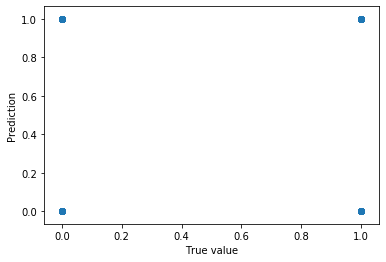

In [56]:
plt.scatter(y_test,y_pred1)
plt.xlabel("True value")
plt.ylabel("Prediction")
plt.show()

In [59]:
pd.DataFrame(cm(y_test,y_pred1),
            columns=['A_T','A_F'],
            index = ['P_T','P_F'])

,A_T,A_F
P_T,11,32
P_F,26,111


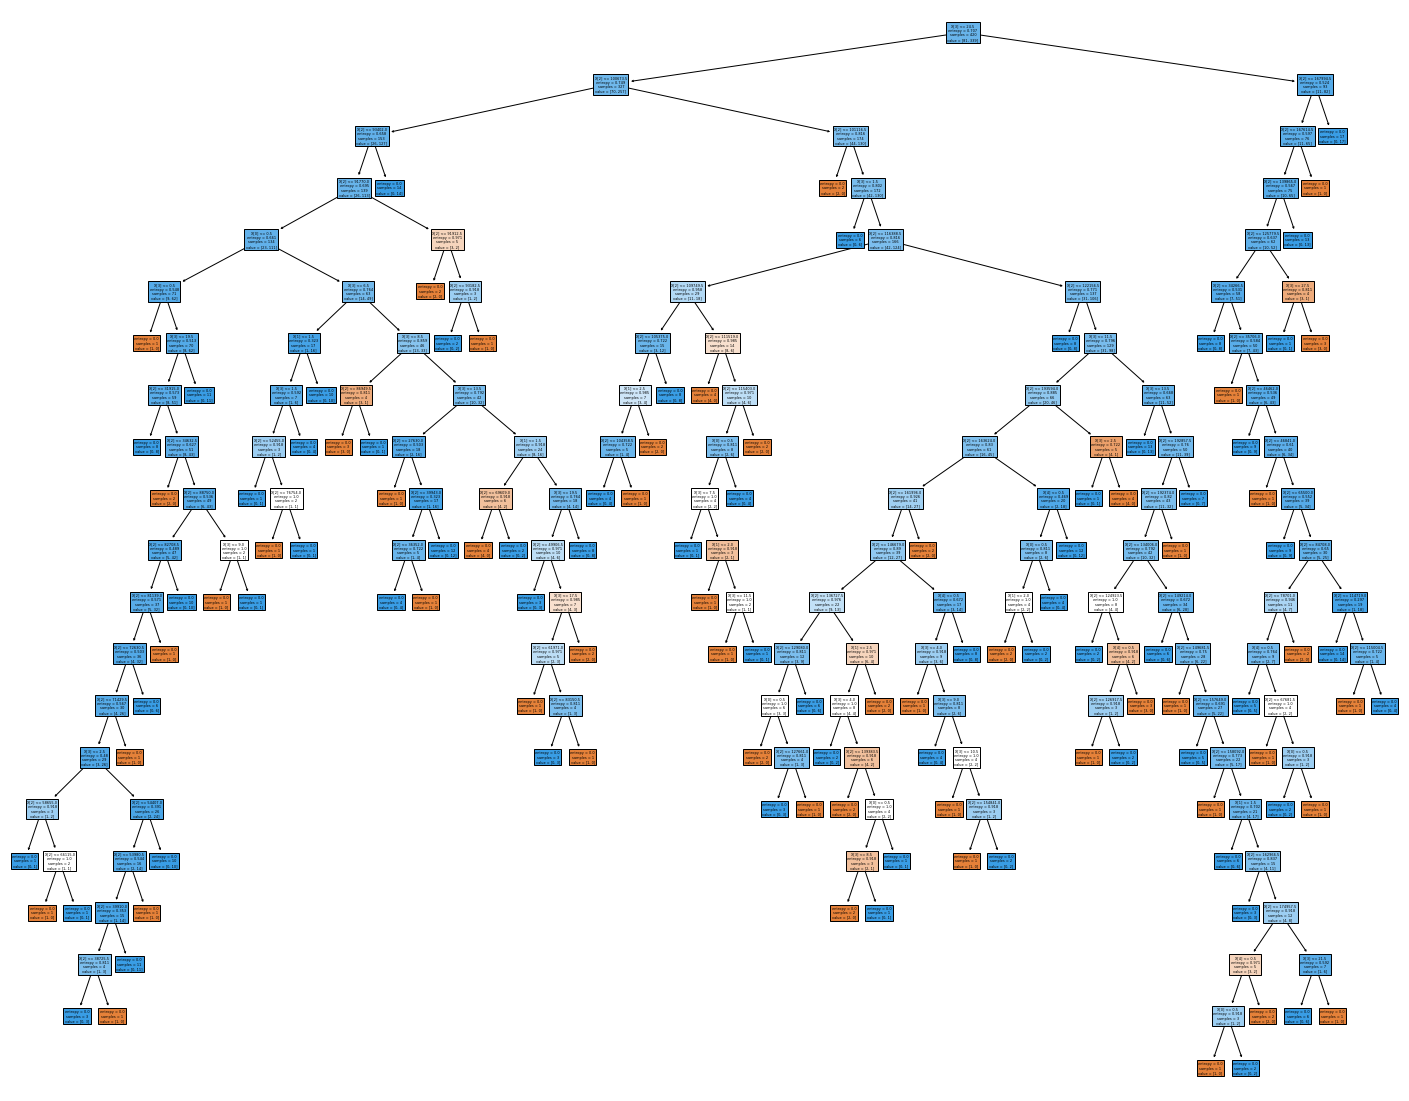

In [60]:
fig = plt.figure(figsize=(25,20))
_=tree.plot_tree(model1,filled=True)

# random_forest

In [81]:
#feature_scaling
from sklearn.preprocessing import StandardScaler as sc
from sklearn.ensemble import RandomForestRegressor as RF
from sklearn import metrics

In [67]:
sc = sc()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [70]:
model2 = RF(n_estimators = 20, random_state = 1)
model2.fit(x_train,y_train)

C:\Users\This\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(n_estimators=20, random_state=1)

In [72]:
y_pred2 = model2.predict(x_test)
print("y_pred\n",y_pred2)

y_pred
 [0.6  0.75 1.   0.45 0.65 0.85 0.9  0.7  0.8  0.4  0.95 0.95 0.75 0.3
 0.85 0.95 0.75 0.9  0.95 0.7  1.   0.95 0.5  0.8  1.   0.7  0.3  0.95
 0.95 0.85 0.85 0.7  0.3  0.9  1.   1.   0.6  0.95 0.8  0.55 0.65 0.5
 0.95 0.6  0.95 0.85 0.95 0.9  0.6  0.6  0.95 0.85 0.75 0.9  1.   1.
 0.6  0.85 0.55 0.65 0.8  0.85 0.8  0.85 0.95 0.8  0.85 1.   0.75 1.
 0.55 0.7  0.95 1.   0.7  1.   0.95 0.6  1.   0.9  1.   0.85 0.8  0.9
 0.85 0.8  0.45 0.8  0.7  0.9  0.8  0.7  0.95 0.65 0.7  0.9  0.9  0.75
 0.8  0.85 0.65 0.35 0.65 0.6  0.75 0.75 1.   0.9  1.   0.75 0.95 0.65
 0.6  0.55 0.55 1.   0.65 0.65 0.75 0.85 0.35 0.65 0.6  0.9  0.6  0.6
 0.8  0.75 0.75 1.   0.7  0.75 0.85 0.5  1.   0.75 0.7  0.85 0.7  1.
 1.   0.35 0.55 0.85 0.25 0.9  0.7  0.65 0.75 0.8  0.45 0.45 0.75 0.85
 0.85 0.5  0.85 1.   0.7  0.7  1.   0.85 0.7  0.9  0.85 1.   0.9  0.95
 0.7  0.8  0.85 0.65 0.9  0.8  0.75 0.8  0.85 0.7  0.85 0.9 ]


In [75]:
acc2 = accuracy_score(y_test,y_pred2.round())
print(acc2)

0.6944444444444444


In [84]:
print("mean absolutr error:", metrics.mean_absolute_error(y_test,y_pred2))
print("mean squared error:", metrics.mean_squared_error(y_test,y_pred2))
rmse = print("root mean squared error:", np.sqrt(metrics.mean_squared_error(y_test,y_pred2)))


mean absolutr error: 0.3644444444444444
mean squared error: 0.22041666666666665
root mean squared error: 0.46948553403344245


# XGboost

In [87]:
from xgboost import XGBClassifier as xg

In [88]:
model3 = xg()
model3.fit(x_train,y_train)

C:\Users\This\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [89]:
print(model3)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [90]:
y_pred3 = model3.predict(x_test)

In [91]:
pred = [round(value) for value in y_pred3]

In [92]:
#Evaluate predictions
acc3 = accuracy_score(y_test, pred)
print("acc : % 2f%%" %(acc3 * 100.0))

acc :  69.444444%


In [93]:
print("DT",acc1)
print("RF",acc2)
print("Xg",acc3)

DT 0.6777777777777778
RF 0.6944444444444444
Xg 0.6944444444444444
